<a href="https://colab.research.google.com/github/sampiecz/490_ASSN3/blob/master/ASSN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and dataset generation.

In [16]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
 
num_observations = 10000
x1 = np.random.multivariate_normal([0,0], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x2 = np.random.multivariate_normal([3,3], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x3 = np.random.multivariate_normal([3,0], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x4 = np.random.multivariate_normal([0,3], [[0.1, 0.2], [0.2, 0.1]], num_observations)
features = np.vstack((x1, x2, x3, x4)).astype(np.float32)
labels = np.hstack((np.full(num_observations, 0), np.full(num_observations,1), np.full(2*num_observations, 2)))
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


Features and labels XOR data vis

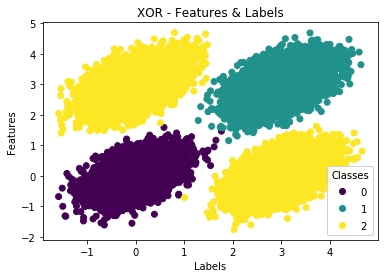

In [17]:
# XOR data vis.  
fig, ax = plt.subplots()
ax.set_ylabel("Features")
ax.set_xlabel("Labels")
scatter = ax.scatter(features[5000:, 0], features[5000:, 1], c=labels[5000:])
plt.title("XOR - Features & Labels")
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)

Training data visualization

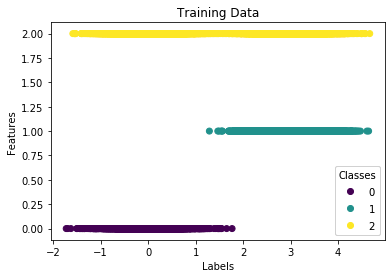

In [18]:

# Training data.
fig, ax = plt.subplots()
ax.set_ylabel("Features")
ax.set_xlabel("Labels")
scatter = ax.scatter(X_train[:,0], y_train, c=y_train)
plt.title("Training Data")
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)
plt.show()

Model 1 - Build, compile, fit, evaluate

In [19]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation="relu"),
      tensorflow.keras.layers.Dropout(0.1),
    tensorflow.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test, verbose=2)

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 1s 45us/sample - loss: 0.7607 - acc: 0.7556
Epoch 2/5
26800/26800 [==============================] - 1s 45us/sample - loss: 0.1457 - acc: 0.9524
Epoch 3/5
26800/26800 [==============================] - 1s 43us/sample - loss: 0.0931 - acc: 0.9666
Epoch 4/5
26800/26800 [==============================] - 1s 43us/sample - loss: 0.0662 - acc: 0.9800
Epoch 5/5
26800/26800 [==============================] - 1s 46us/sample - loss: 0.0497 - acc: 0.9866
13200/13200 - 0s - loss: 0.0112 - acc: 0.9986


[0.011191865556845159, 0.9985606]

Plot Decision Boundary for Model 1

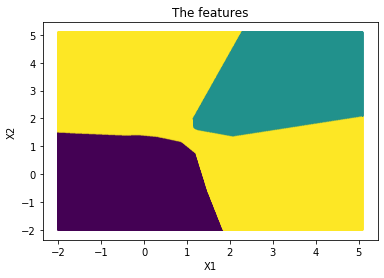

In [20]:
def plot_decision_boundary(X, Y, model):
  X, Y = np.mgrid[-2:5.1:0.01, -2:5.1:0.01]
  xy = np.vstack((X.flatten(), Y.flatten())).T
  testDataY1 = model.predict_classes(xy)
  marker_size=1
  plt.scatter(xy[:,0], xy[:,1], marker_size, c=testDataY1)
  plt.title("The features")
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.show()

plot_decision_boundary(features, labels, model)

Repeat process for Model 2

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 1s 49us/sample - loss: 0.7031 - acc: 0.8570
Epoch 2/5
26800/26800 [==============================] - 1s 48us/sample - loss: 0.0604 - acc: 0.9911
Epoch 3/5
26800/26800 [==============================] - 1s 51us/sample - loss: 0.0305 - acc: 0.9939
Epoch 4/5
26800/26800 [==============================] - 1s 53us/sample - loss: 0.0190 - acc: 0.9965
Epoch 5/5
26800/26800 [==============================] - 1s 50us/sample - loss: 0.0120 - acc: 0.9978
13200/13200 - 0s - loss: 0.0031 - acc: 0.9998


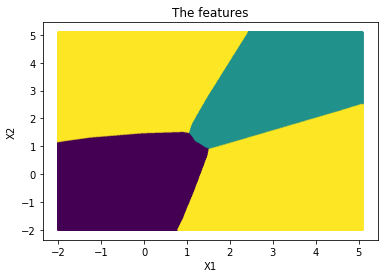

In [21]:
model2 = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(20, activation="relu"),
      tensorflow.keras.layers.Dropout(0.1),
    tensorflow.keras.layers.Dense(30, activation="softmax")
])
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model2.fit(X_train, y_train, epochs=5)
model2.evaluate(X_test, y_test, verbose=2)
plot_decision_boundary(features, labels, model2)

Repeat process for Model 3

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 1s 53us/sample - loss: 1.1166 - acc: 0.7068
Epoch 2/5
26800/26800 [==============================] - 1s 51us/sample - loss: 0.2958 - acc: 0.8868
Epoch 3/5
26800/26800 [==============================] - 1s 49us/sample - loss: 0.2410 - acc: 0.9038
Epoch 4/5
26800/26800 [==============================] - 1s 51us/sample - loss: 0.2153 - acc: 0.9113
Epoch 5/5
26800/26800 [==============================] - 1s 51us/sample - loss: 0.2051 - acc: 0.9145
13200/13200 - 0s - loss: 0.0357 - acc: 0.9931


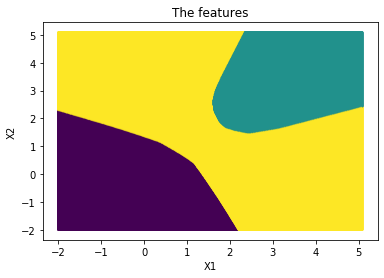

In [22]:
model3 = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(50, activation="relu"),
      tensorflow.keras.layers.Dropout(0.8),
    tensorflow.keras.layers.Dense(50, activation="softmax")
])
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model3.fit(X_train, y_train, epochs=5)
model3.evaluate(X_test, y_test, verbose=2)
plot_decision_boundary(features, labels, model3)

Repeat process for Model 4

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 1s 50us/sample - loss: 0.5120 - acc: 0.9062
Epoch 2/5
26800/26800 [==============================] - 1s 47us/sample - loss: 0.0166 - acc: 0.9986
Epoch 3/5
26800/26800 [==============================] - 1s 51us/sample - loss: 0.0073 - acc: 0.9992
Epoch 4/5
26800/26800 [==============================] - 1s 53us/sample - loss: 0.0046 - acc: 0.9995
Epoch 5/5
26800/26800 [==============================] - 1s 50us/sample - loss: 0.0030 - acc: 0.9996
13200/13200 - 0s - loss: 0.0011 - acc: 1.0000


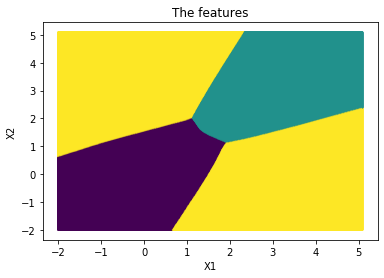

In [23]:
model4 = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(50, activation="relu"),
      tensorflow.keras.layers.Dropout(0.1),
    tensorflow.keras.layers.Dense(50, activation="softmax")
])
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model4.fit(X_train, y_train, epochs=5)
model4.evaluate(X_test, y_test, verbose=2)
plot_decision_boundary(features, labels, model4)

Repeat process for Model 5

Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 2s 64us/sample - loss: 0.5201 - acc: 0.9091
Epoch 2/5
26800/26800 [==============================] - 2s 61us/sample - loss: 0.0305 - acc: 0.9927
Epoch 3/5
26800/26800 [==============================] - 1s 54us/sample - loss: 0.0164 - acc: 0.9963
Epoch 4/5
26800/26800 [==============================] - 1s 52us/sample - loss: 0.0113 - acc: 0.9972
Epoch 5/5
26800/26800 [==============================] - 2s 57us/sample - loss: 0.0088 - acc: 0.9979
13200/13200 - 0s - loss: 0.0017 - acc: 0.9998


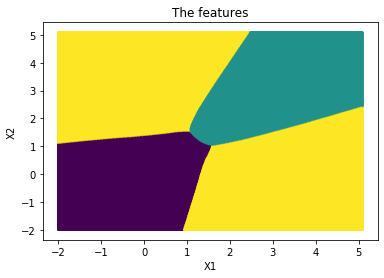

In [24]:
model5 = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(100, activation="relu"),
      tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(100, activation="softmax")
])
model5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model5.fit(X_train, y_train, epochs=5)
model5.evaluate(X_test, y_test, verbose=2)
plot_decision_boundary(features, labels, model5)